# Main notebook for presenting results

**[WARNING]:** *Do not forget to run the `setup.py`script, and to choose the correct virtual environment for this notebook*  

In [1]:
%run setup.py 

Checking the dataset existence and integrity.
Dataset does not exist or is corrupted. Downloading again...
Started downloading dataset from https://os.unil.cloud.switch.ch/fma/fma_metadata.zip...


Download: |████████████████████████████████████████| 100.0%
Dowload Finished !
Unzipping files...
Files extracted in the following folder: /home/onyxia/applied-statistical-learning/data/fma_metadata
Installing dependencies
Creating a new virtual environment...
Installing dependancies from requirements.txt...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 6.3 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 21.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 35.4 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 57.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 75.0 MB/s  0:00:01m0:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 57.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 56.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%pip install -r requirements.txt

# Statistiques descriptives

In [29]:
from collections import Counter

Counter(features[~features["label"].isna()]["label"]) #very asymetric, plotable

Counter({'Rock': 10727,
         'Experimental': 8896,
         'Electronic': 7639,
         'Hip-Hop': 2960,
         'Folk': 2054,
         'Pop': 1987,
         'Instrumental': 1936,
         'International': 1118,
         'Classical': 1039,
         'Jazz': 354,
         'Spoken': 268,
         'Old-Time / Historic': 215,
         'Soul-RnB': 115,
         'Country': 103,
         'Blues': 51,
         'Easy Listening': 23})

On remaruqe un très fort déséqulibre, il va falloir a minima pondérer tout ça.

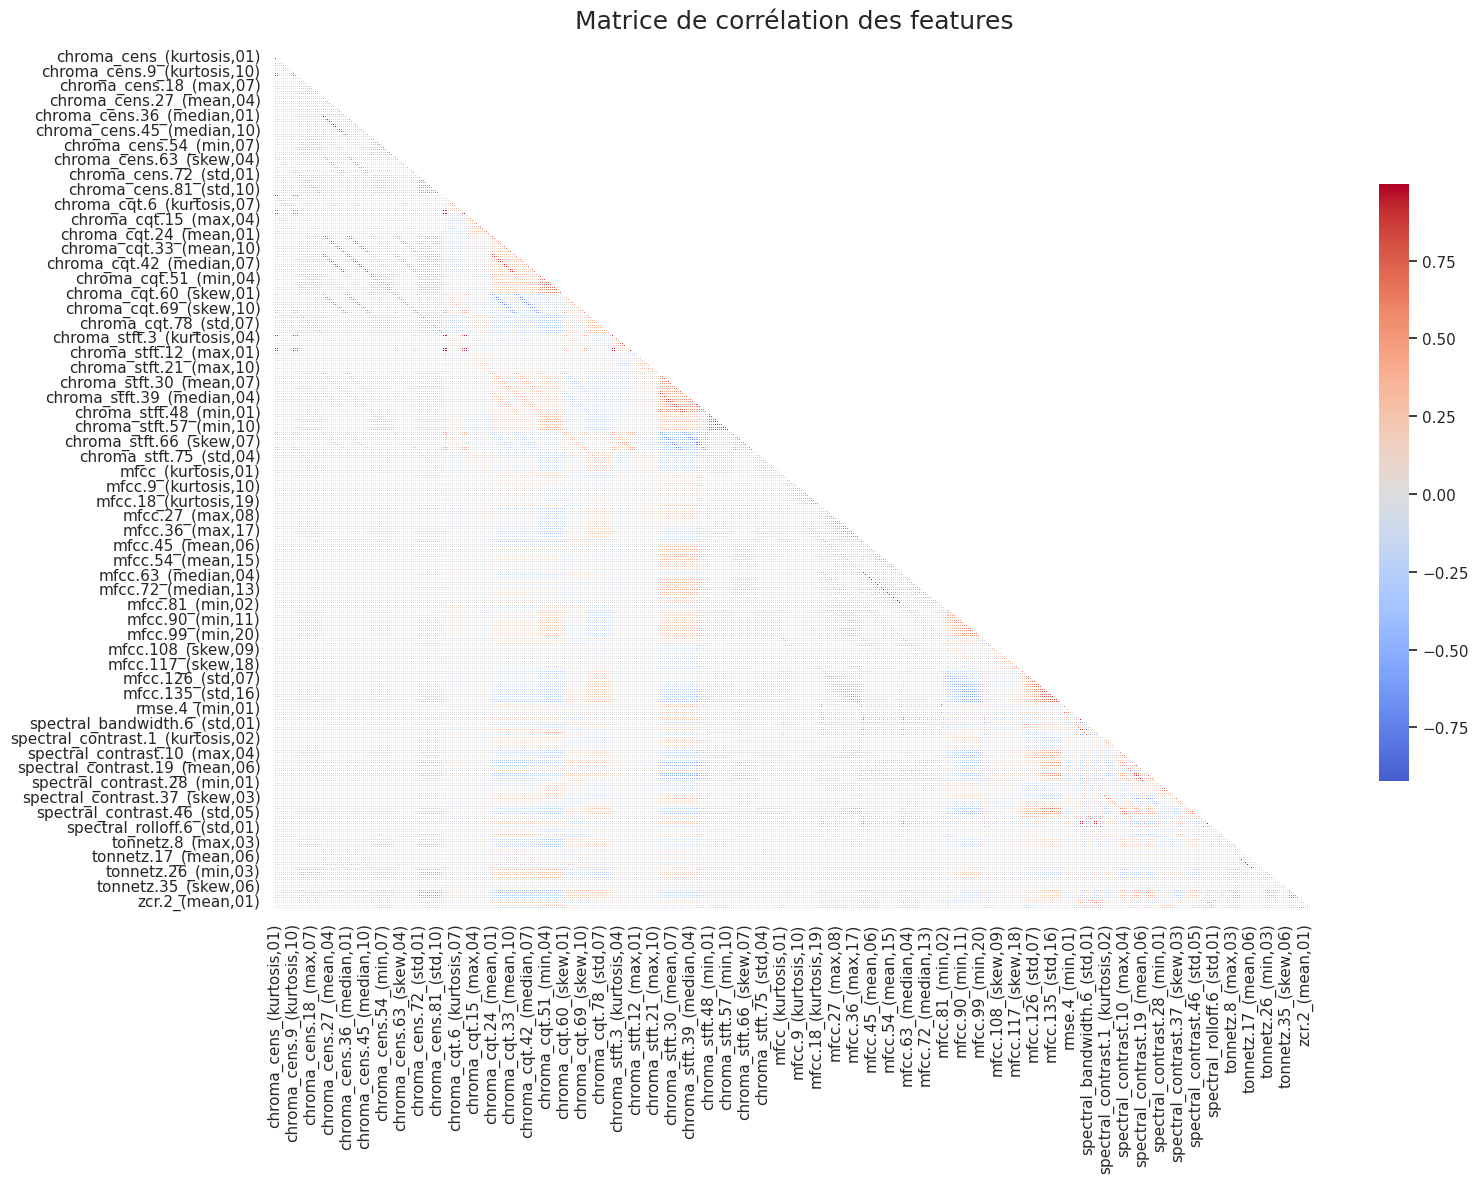

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# df = ton dataframe

plt.figure(figsize=(16, 12))
corr = features.corr(numeric_only=True)

# Masque pour n'afficher que la moitié supérieure
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.set_theme(style="white")

ax = sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    center=0,
    annot=False,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
)

plt.title("Matrice de corrélation des features", fontsize=18, pad=20)
plt.tight_layout()
plt.show()


In [3]:
threshold = 0.9

correlated_pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        .stack()
        .sort_values(ascending=False)
)

print(correlated_pairs[correlated_pairs.abs() > threshold])

chroma_cqt.10_(kurtosis,11)     chroma_cqt.11_(kurtosis,12)         0.996626
chroma_stft.1_(kurtosis,02)     chroma_stft.11_(kurtosis,12)        0.995416
mfcc.49_(mean,10)               mfcc.69_(median,10)                 0.994761
chroma_stft.9_(kurtosis,10)     chroma_stft.10_(kurtosis,11)        0.994596
spectral_contrast.16_(mean,03)  spectral_contrast.23_(median,03)    0.994490
                                                                      ...   
chroma_cqt.42_(median,07)       chroma_cqt.66_(skew,07)            -0.906854
chroma_stft.38_(median,03)      chroma_stft.62_(skew,03)           -0.908238
chroma_stft.27_(mean,04)        chroma_stft.63_(skew,04)           -0.910494
chroma_stft.28_(mean,05)        chroma_stft.64_(skew,05)           -0.911779
chroma_stft.26_(mean,03)        chroma_stft.62_(skew,03)           -0.922629
Length: 202, dtype: float64


In [2]:
df = pd.read_csv('data/fma_metadata/features.csv')
for col in df.columns:
    print(col)

feature
chroma_cens
chroma_cens.1
chroma_cens.2
chroma_cens.3
chroma_cens.4
chroma_cens.5
chroma_cens.6
chroma_cens.7
chroma_cens.8
chroma_cens.9
chroma_cens.10
chroma_cens.11
chroma_cens.12
chroma_cens.13
chroma_cens.14
chroma_cens.15
chroma_cens.16
chroma_cens.17
chroma_cens.18
chroma_cens.19
chroma_cens.20
chroma_cens.21
chroma_cens.22
chroma_cens.23
chroma_cens.24
chroma_cens.25
chroma_cens.26
chroma_cens.27
chroma_cens.28
chroma_cens.29
chroma_cens.30
chroma_cens.31
chroma_cens.32
chroma_cens.33
chroma_cens.34
chroma_cens.35
chroma_cens.36
chroma_cens.37
chroma_cens.38
chroma_cens.39
chroma_cens.40
chroma_cens.41
chroma_cens.42
chroma_cens.43
chroma_cens.44
chroma_cens.45
chroma_cens.46
chroma_cens.47
chroma_cens.48
chroma_cens.49
chroma_cens.50
chroma_cens.51
chroma_cens.52
chroma_cens.53
chroma_cens.54
chroma_cens.55
chroma_cens.56
chroma_cens.57
chroma_cens.58
chroma_cens.59
chroma_cens.60
chroma_cens.61
chroma_cens.62
chroma_cens.63
chroma_cens.64
chroma_cens.65
chroma_cens.66

In [3]:
print(df['chroma_cens.10'])

0                 kurtosis
1                       11
2                      NaN
3         1.3477915525e+00
4         1.0382531881e+00
                ...       
106572           -0.190785
106573           -0.746905
106574            1.307971
106575            1.402555
106576           -0.834298
Name: chroma_cens.10, Length: 106577, dtype: object


In [2]:
import pandas as pd
echonest = pd.read_csv('data/fma_metadata/echonest.csv')

In [3]:
echonest = echonest.iloc[:,:9]

In [4]:
new_columns = echonest.iloc[1]
echonest.columns = new_columns
new_columns.iloc[0] = 'track_id' 
echonest = echonest.iloc[3:].reset_index(drop=True)

echonest

1,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880
1,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421
2,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,0.3731433124,0.1245953419,100.2600000000,0.6216612236
3,10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,0.1154738842,0.0329852191,111.5620000000,0.9635898919
4,134,0.4522173071,0.5132380502,0.5604099311,0.0194426943,0.0965666940,0.5255193792,114.2900000000,0.8940722715
...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.08255,141.332,0.890461
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274


In [70]:
tracks = pd.read_csv('data/fma_metadata/tracks.csv')
tracks.rename(columns={'Unnamed: 0':'track_id'},inplace=True)

train = tracks['set'] == 'training'
val = tracks['set'] == 'validation'
test = tracks['set']== 'test'

In [71]:
label = tracks[['track_id','track.7','set']]
label.rename(columns={'track.7':'genre_top'},inplace=True)
label = label[2:]

label

/tmp/ipykernel_16324/1089924658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label.rename(columns={'track.7':'genre_top'},inplace=True)


,track_id,genre_top,set
2,2,Hip-Hop,training
3,3,Hip-Hop,training
4,5,Hip-Hop,training
5,10,Pop,training
6,20,NaN,training
...,...,...,...
106571,155316,Rock,training
106572,155317,Rock,training
106573,155318,Rock,training
106574,155319,Rock,training


In [72]:
full_set = pd.merge(echonest,label,how='inner',on='track_id')
full_set

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top,set
0,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,Hip-Hop,training
1,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,Hip-Hop,training
2,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,0.3731433124,0.1245953419,100.2600000000,0.6216612236,Hip-Hop,training
3,10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,0.1154738842,0.0329852191,111.5620000000,0.9635898919,Pop,training
4,134,0.4522173071,0.5132380502,0.5604099311,0.0194426943,0.0965666940,0.5255193792,114.2900000000,0.8940722715,Hip-Hop,training
...,...,...,...,...,...,...,...,...,...,...,...
10887,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.08255,141.332,0.890461,NaN,training
10888,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845,NaN,training
10889,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667,NaN,training
10890,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274,NaN,training


In [77]:
train = full_set[full_set['set'] == 'training']
test = full_set[full_set['set'] == 'test']
train.dropna(inplace=True)
test.dropna(inplace=True)

print(train.size,test.size,test.size*100/train.size)

69696 7711 11.063762626262626


/tmp/ipykernel_16324/4174452763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(inplace=True)
/tmp/ipykernel_16324/4174452763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.dropna(inplace=True)


In [ ]:
X_train = train.drop(columns=['genre_top', 'set', 'track_id'])
y_train = train['genre_top']

X_test  = test.drop(columns=['genre_top', 'set', 'track_id'])
y_test  = test['genre_top']

11.063762626262626


In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

model = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=5000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

                     precision    recall  f1-score   support

              Blues       0.00      0.00      0.00         8
          Classical       0.00      0.00      0.00         1
         Electronic       0.65      0.43      0.52       158
       Experimental       0.00      0.00      0.00         7
               Folk       0.42      0.11      0.18       122
            Hip-Hop       0.54      0.75      0.63        28
       Instrumental       0.01      0.05      0.02        20
      International       0.18      0.58      0.28        12
               Jazz       0.03      0.22      0.06         9
Old-Time / Historic       0.39      0.87      0.54        15
                Pop       0.33      0.42      0.37        55
               Rock       0.90      0.38      0.53       266

           accuracy                           0.36       701
          macro avg       0.29      0.32      0.26       701
       weighted avg       0.62      0.36      0.42       701

